In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook
sns.set_style("whitegrid")
sns.set_palette("colorblind")

# from matplotlib import rc
# rc('font',**{'family':'sans-serif'})
# rc('axes', **{'titlesize': '8', 'labelsize': '6'})
# rc('legend', **{'fontsize': '6'})
# rc('figure', **{'dpi' : 200})

In [2]:
!dir | sort



               3 Dir(s)  135,571,365,888 bytes free
              15 File(s)     56,935,966 bytes
 Directory of C:\Users\Tino\Desktop\NTNU\Machine Learning\Project\machine_learning_group_64-main\data
 Volume in drive C is BOOTCAMP
 Volume Serial Number is 444A-838B
10/12/2021  04:10 PM             1,202 sku_features.csv
10/12/2021  04:10 PM            66,431 id_store_sku.csv
10/12/2021  04:10 PM         1,624,837 sampleSubmission.csv
10/12/2021  04:10 PM         2,203,483 submission.csv
10/12/2021  04:10 PM         4,996,766 beer_test.csv
10/12/2021  04:10 PM        33,767,849 beer_train.csv
10/20/2021  05:14 AM            44,973 ML - Projecto01.ipynb
10/20/2021  06:07 AM         5,185,884 intro_submission.csv
11/03/2021  01:19 AM            51,571 Ensemble Learning.ipynb
11/03/2021  08:37 AM            89,013 ML - Project 02.ipynb
11/03/2021  09:45 AM            80,582 ML - AdaBoost - Martin.ipynb
11/03/2021  10:20 AM            80,582 ML - CatBoost - Martin.ipynb
11/03/2021  11:13 

In [3]:
# Reading datasets
train = pd.read_csv('beer_train.csv', parse_dates=['Date'])
test = pd.read_csv('beer_test.csv', parse_dates=['Date'])
sku_features = pd.read_csv('sku_features.csv')
id_map = pd.read_csv('id_store_sku.csv')
submission = pd.read_csv('sampleSubmission.csv')

In [4]:
# Train set
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382321 entries, 0 to 1382320
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   Date     1382321 non-null  datetime64[ns]
 1   ts_id    1382321 non-null  int64         
 2   isPromo  1382321 non-null  float64       
 3   Sales    1382321 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 42.2 MB
None


,Date,ts_id,isPromo,Sales
0,2015-06-15,0,0.0,0.10
1,2015-06-15,1,0.0,0.35
2,2015-06-15,2,1.0,0.60
3,2015-06-15,3,1.0,0.35
4,2015-06-15,4,0.0,0.15


In [5]:
# Test set
print(test.info())
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192882 entries, 0 to 192881
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   id       192882 non-null  int64         
 1   Date     192882 non-null  datetime64[ns]
 2   ts_id    192882 non-null  int64         
 3   isPromo  192882 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 5.9 MB
None


,id,Date,ts_id,isPromo
0,0,2017-06-15,0,0.0
1,1,2017-06-15,1,1.0
2,2,2017-06-15,2,1.0
3,3,2017-06-15,3,1.0
4,4,2017-06-15,4,0.0


In [6]:
# SKU features
sku_features

,SKU,Segment,Pack,Product,Brand,Volume
0,"_Carlsberg Can 0,45",MainStream,Can,Lager,Carlsberg,0.45
1,"_Flash Up Energy PET 0,5",High Margin,PET,Energy-drink,Flash,0.50
2,"_Holsten Bottle 0,47",Premium,Bottle,Lager,Holsten,0.50
3,"_Tuborg Green Can 0,45",Premium,Can,Lager,Tuborg,0.45
4,"_Tuborg Green Bottle 0,48",Premium,Bottle,Lager,Tuborg,0.50
5,"_Zatecky Gus Can 0,45",Premium,Can,Lager,Zatecky Gus,0.45
6,"_Zatecky Gus Bottle 0,48",Premium,Bottle,Lager,Zatecky Gus,0.50
7,"_Zatecky Gus PET 1,42",Premium,PET,Lager,Zatecky Gus,1.50
8,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,0.45
9,"_Baltika №3 Can 0,45",MainStream,Can,Lager,Baltika №3,0.45


In [7]:
# This dataset is needed to match ts_id with its corresponding SKU and Store
id_map.head()

,ts_id,Store,SKU
0,0,3301,"_Baltika №0 Can 0,45"
1,1,3301,"_Baltika №3 Can 0,45"
2,2,3301,"_Baltika №7 Can 0,45"
3,3,3301,"_Baltika №7 Bottle 0,47"
4,4,3301,"_Baltika №9 Can 0,45"


In [8]:
def plot_by_id(df, ts_id):
    df_ = df[df['ts_id'] == ts_id][['Date', 'Sales']]
    g = sns.lineplot(df_['Date'], df_['Sales'])
    plt.xticks(rotation=90)
    
def plot_promo_sales(df, ts_id):
    df_ = df[df['ts_id'] == ts_id][['Date', 'isPromo', 'Sales']]
    fig, axs = plt.subplots(2, 1, sharex=True)
    sns.lineplot(df_['Date'], df_['Sales'], ax=axs[0], color='r')
    sns.lineplot(df_['Date'], df_['isPromo'], ax=axs[1], color='b')
    plt.xticks(rotation=90)

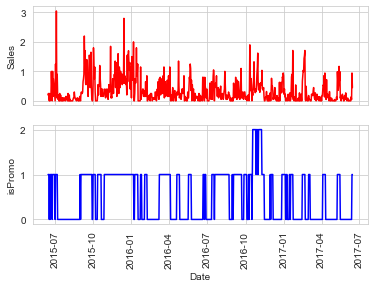

In [9]:
plot_promo_sales(train, 69)

#Basic Feature Engineering

In [10]:
# This is a core part of the transition from a time-series prediction to a regression problem.
# The main idea is to featurize time in a way that it will keep the important information about the date.

def generate_features(df, sku_features, id_map):
        
    # Add metadata
    df = pd.merge(df, id_map, how='left', on='ts_id')
    df = pd.merge(df, sku_features, how='left', on='SKU')

    # Time features
    df['day_of_month'] = df['Date'].dt.day
    df['day_of_week'] = df['Date'].dt.dayofweek
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['week'] = df['Date'].dt.week
    
    # Enlarge promo features
    # Since we know that promo is important
    
    #df['ts_promo'] = df['ts_id'].astype(str) + df['isPromo'].astype(str)
    #df['store_promo'] = df['Store'].astype(str) + df['isPromo'].astype(str)
    #df['segment_promo'] = df['Segment'].astype(str) + df['isPromo'].astype(str)
    #df['brand_promo'] = df['Brand'].astype(str) + df['isPromo'].astype(str)
    #df['sku_promo'] = df['SKU'].astype(str) + df['isPromo'].astype(str)
    
    #df['dom_promo'] = df['day_of_month'].astype(str) + df['isPromo'].astype(str)
    #df['dow_promo'] = df['day_of_week'].astype(str) + df['isPromo'].astype(str)
    
    return df

In [11]:
train.head()

,Date,ts_id,isPromo,Sales
0,2015-06-15,0,0.0,0.10
1,2015-06-15,1,0.0,0.35
2,2015-06-15,2,1.0,0.60
3,2015-06-15,3,1.0,0.35
4,2015-06-15,4,0.0,0.15


In [12]:
# Generate 2 dataframes
train_with_features = generate_features(train, sku_features, id_map)
test_with_features = generate_features(test, sku_features, id_map)

In [13]:
train_with_features.head()

,Date,ts_id,isPromo,Sales,Store,SKU,Segment,Pack,Product,Brand,Volume,day_of_month,day_of_week,month,year,week
0,2015-06-15,0,0.0,0.10,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,0.45,15,0,6,2015,25
1,2015-06-15,1,0.0,0.35,3301,"_Baltika №3 Can 0,45",MainStream,Can,Lager,Baltika №3,0.45,15,0,6,2015,25
2,2015-06-15,2,1.0,0.60,3301,"_Baltika №7 Can 0,45",Premium,Can,Lager,Baltika №7,0.45,15,0,6,2015,25
3,2015-06-15,3,1.0,0.35,3301,"_Baltika №7 Bottle 0,47",Premium,Bottle,Lager,Baltika №7,0.50,15,0,6,2015,25
4,2015-06-15,4,0.0,0.15,3301,"_Baltika №9 Can 0,45",MainStream,Can,Lager,Baltika №9,0.45,15,0,6,2015,25


In [14]:
test_with_features.head()

,id,Date,ts_id,isPromo,Store,SKU,Segment,Pack,Product,Brand,Volume,day_of_month,day_of_week,month,year,week
0,0,2017-06-15,0,0.0,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,0.45,15,3,6,2017,24
1,1,2017-06-15,1,1.0,3301,"_Baltika №3 Can 0,45",MainStream,Can,Lager,Baltika №3,0.45,15,3,6,2017,24
2,2,2017-06-15,2,1.0,3301,"_Baltika №7 Can 0,45",Premium,Can,Lager,Baltika №7,0.45,15,3,6,2017,24
3,3,2017-06-15,3,1.0,3301,"_Baltika №7 Bottle 0,47",Premium,Bottle,Lager,Baltika №7,0.50,15,3,6,2017,24
4,4,2017-06-15,4,0.0,3301,"_Baltika №9 Can 0,45",MainStream,Can,Lager,Baltika №9,0.45,15,3,6,2017,24


In [15]:
train_with_features.dtypes

Date            datetime64[ns]
ts_id                    int64
isPromo                float64
Sales                  float64
Store                   object
SKU                     object
Segment                 object
Pack                    object
Product                 object
Brand                   object
Volume                 float64
day_of_month             int64
day_of_week              int64
month                    int64
year                     int64
week                     int64
dtype: object

In [16]:
# Last manipulation of dataframes, to make XGBoost work
'''train_encoded = pd.get_dummies(train_with_features, columns = ['isPromo',
                                                               'Store',
                                                               'Segment',
                                                               'Pack',
                                                               'Product',
                                                               'Brand',
                                                               'Volume',
                                                               'day_of_month',
                                                               'day_of_week',
                                                               'month',
                                                               'year',
                                                               'week'])'''
##
train_encoded = pd.get_dummies(train_with_features, columns = ['isPromo',
                                                               'Segment',
                                                               'Pack',
                                                               'Product'])


# Modify test dataset
test_encoded = pd.get_dummies(test_with_features, columns = ['isPromo',
                                                               'Segment',
                                                               'Pack',
                                                               'Product'])


In [17]:
#Delete columns from the encoded dataset: Some of these should go back in
del(train_encoded['SKU'], train_encoded['Store'], train_encoded['Brand'], train_encoded['Volume'],train_encoded['day_of_month'])
del(test_encoded['SKU'], test_encoded['Store'], test_encoded['Brand'], test_encoded['Volume'],test_encoded['day_of_month'])

In [18]:
train_encoded.head()

,Date,ts_id,Sales,day_of_week,month,year,week,isPromo_0.0,isPromo_1.0,isPromo_2.0,Segment_High Margin,Segment_MainStream,Segment_Premium,Pack_Bottle,Pack_Can,Pack_PET,Product_Energy-drink,Product_Lager,Product_Non-alco,Product_Other
0,2015-06-15,0,0.10,0,6,2015,25,1,0,0,0,0,1,0,1,0,0,0,1,0
1,2015-06-15,1,0.35,0,6,2015,25,1,0,0,0,1,0,0,1,0,0,1,0,0
2,2015-06-15,2,0.60,0,6,2015,25,0,1,0,0,0,1,0,1,0,0,1,0,0
3,2015-06-15,3,0.35,0,6,2015,25,0,1,0,0,0,1,1,0,0,0,1,0,0
4,2015-06-15,4,0.15,0,6,2015,25,1,0,0,0,1,0,0,1,0,0,1,0,0


In [19]:
test_encoded.head()
# The difference between test and train is that train has Sales and test has id.

,id,Date,ts_id,day_of_week,month,year,week,isPromo_0.0,isPromo_1.0,isPromo_2.0,Segment_High Margin,Segment_MainStream,Segment_Premium,Pack_Bottle,Pack_Can,Pack_PET,Product_Energy-drink,Product_Lager,Product_Non-alco,Product_Other
0,0,2017-06-15,0,3,6,2017,24,1,0,0,0,0,1,0,1,0,0,0,1,0
1,1,2017-06-15,1,3,6,2017,24,0,1,0,0,1,0,0,1,0,0,1,0,0
2,2,2017-06-15,2,3,6,2017,24,0,1,0,0,0,1,0,1,0,0,1,0,0
3,3,2017-06-15,3,3,6,2017,24,0,1,0,0,0,1,1,0,0,0,1,0,0
4,4,2017-06-15,4,3,6,2017,24,1,0,0,0,1,0,0,1,0,0,1,0,0


In [20]:
train_y = train_encoded['Sales']
train_x = train_encoded
del(train_x['Sales'], train_x['Date'])
# I have to remove SKU column
#del(train_x['SKU'])

In [21]:
test = test_encoded
del(test['Date'], test['id']) # Should I delete id?? 

In [22]:
train_y.head()

0    0.10
1    0.35
2    0.60
3    0.35
4    0.15
Name: Sales, dtype: float64

In [23]:
train_x.head()

,ts_id,day_of_week,month,year,week,isPromo_0.0,isPromo_1.0,isPromo_2.0,Segment_High Margin,Segment_MainStream,Segment_Premium,Pack_Bottle,Pack_Can,Pack_PET,Product_Energy-drink,Product_Lager,Product_Non-alco,Product_Other
0,0,0,6,2015,25,1,0,0,0,0,1,0,1,0,0,0,1,0
1,1,0,6,2015,25,1,0,0,0,1,0,0,1,0,0,1,0,0
2,2,0,6,2015,25,0,1,0,0,0,1,0,1,0,0,1,0,0
3,3,0,6,2015,25,0,1,0,0,0,1,1,0,0,0,1,0,0
4,4,0,6,2015,25,1,0,0,0,1,0,0,1,0,0,1,0,0


In [24]:
test.head()

,ts_id,day_of_week,month,year,week,isPromo_0.0,isPromo_1.0,isPromo_2.0,Segment_High Margin,Segment_MainStream,Segment_Premium,Pack_Bottle,Pack_Can,Pack_PET,Product_Energy-drink,Product_Lager,Product_Non-alco,Product_Other
0,0,3,6,2017,24,1,0,0,0,0,1,0,1,0,0,0,1,0
1,1,3,6,2017,24,0,1,0,0,1,0,0,1,0,0,1,0,0
2,2,3,6,2017,24,0,1,0,0,0,1,0,1,0,0,1,0,0
3,3,3,6,2017,24,0,1,0,0,0,1,1,0,0,0,1,0,0
4,4,3,6,2017,24,1,0,0,0,1,0,0,1,0,0,1,0,0


In [25]:
type(train_y)

pandas.core.series.Series

In [26]:
#######################################################################
########################### Predictive Models #########################
#######################################################################

In [27]:
### XGBoost Start
from xgboost import XGBRegressor

In [54]:
#Hyperparameters
xgbr = XGBRegressor(max_depth=2,
                    subsample=0.7,        # How many samples does it uses
                    n_estimators=500,     # Amount of trees generated
                    colsample_bytree=0.9, # How many features does it use
                    learning_rate=0.2)    # Setup size shrinkage

In [55]:
xgbr.fit(train_x, train_y)
# https://github.com/dmlc/xgboost/issues/2442

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
# Prediction
prediction_XGB = xgbr.predict(test)

In [57]:
prediction_XGB

array([0.15360819, 0.92712903, 0.72924393, ..., 0.2766058 , 0.648715  ,
       0.2766058 ], dtype=float32)

In [58]:
# Prediction to submission
submission['Sales'] = prediction_XGB

In [61]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192882 entries, 0 to 192881
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      192882 non-null  int64  
 1   Sales   192882 non-null  float32
dtypes: float32(1), int64(1)
memory usage: 2.2 MB


In [60]:
# Generate .csv
submission.to_csv('submission_XGB.csv', index=False)

In [35]:
#######################################################################
###################### XGBoost Finished ###############################
#######################################################################

In [36]:
### AdaBoost Starts
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

In [37]:
#Hyperparameters
adar = AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=None)

In [38]:
adar.fit(train_x, train_y)

AdaBoostRegressor(n_estimators=100)

In [39]:
# Prediction
prediction_Ada = adar.predict(test)

In [40]:
prediction_Ada

array([0.16651739, 1.68162554, 0.9183538 , ..., 0.32301917, 1.26725516,
       0.32301917])

In [41]:
# Prediction to submission
submission['Sales'] = prediction_Ada

In [42]:
submission.head()

,id,Sales
0,0,0.166517
1,1,1.681626
2,2,0.918354
3,3,0.894819
4,4,0.306548


In [43]:
# Generate .csv
submission.to_csv('submission_Ada.csv', index=False)

In [44]:
#######################################################################
#################### AdaBoost Finished ################################
#######################################################################

In [45]:
#!pip install catboost

In [53]:
### CatBoost Starts
# https://coderzcolumn.com/tutorials/machine-learning/catboost-an-in-depth-guide-python#5
from catboost import CatBoost

#Hyperparameters
booster = CatBoost(params={'iterations':100, 'verbose':10, 'loss_function':'RMSE'})

In [47]:
booster.fit(train_x, train_y)

Learning rate set to 0.5
0:	learn: 0.4550147	total: 1s	remaining: 1m 39s
10:	learn: 0.4207376	total: 7.61s	remaining: 1m 1s
20:	learn: 0.4108833	total: 14.3s	remaining: 53.9s
30:	learn: 0.4076366	total: 20.2s	remaining: 45.1s
40:	learn: 0.4040925	total: 27.3s	remaining: 39.3s
50:	learn: 0.4016161	total: 33.7s	remaining: 32.3s
60:	learn: 0.3993372	total: 39.4s	remaining: 25.2s
70:	learn: 0.3968535	total: 45.5s	remaining: 18.6s
80:	learn: 0.3954364	total: 51.4s	remaining: 12s
90:	learn: 0.3938709	total: 57.3s	remaining: 5.66s
99:	learn: 0.3921200	total: 1m 3s	remaining: 0us


In [49]:
# Prediction
prediction_Cat = booster.predict(test)
prediction_Cat

array([0.15012029, 0.89531794, 0.78998874, ..., 0.29456172, 0.74467558,
       0.29456172])

In [62]:
# Prediction to submission
submission['Sales'] = prediction_Cat
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192882 entries, 0 to 192881
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      192882 non-null  int64  
 1   Sales   192882 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.9 MB


In [52]:
# Generate .csv
submission.to_csv('submission_Cat.csv', index=False)

In [63]:
#######################################################################
#################### CatBoost Finished ################################
#######################################################################

In [64]:
# Cross Validation

In [ ]:
# Ensembling the different approaches (Stacking/Blending/etc...)